# Аналитическая задача:
* Исследовать параметры, влияющие на цену квартиры;
* Построить прогноз стоимости квартиры взависимости от этих параметров;
* Проверить гипотезу о равенстве средних площадей кухни в 2-х и 3-х комнатных квартирах.

**Исходные данные:**
* Имеется выборка данных о продаже квартир. 

|Признак|Описание признака|
|-------------:|:------------|
|last_price|цена на момент снятия с публикации|
|total_area|площадь квартиры в квадратных метрах (м²)|
|rooms|число комнат|
|ceiling_height|высота потолков (м)|
|floors_total| всего этажей в доме|
|living_area|жилая площадь в квадратных метрах(м²)|
|floor|этаж|
|is_apartment|апартаменты (Boolean)|
|studio|квартира-студия (Boolean)|
|open_plan|свободная планировка (Boolean)|
|kitchen_area|площадь кухни в квадратных метрах (м²)|
|balcony|число балконов|
|airports_nearest|расстояние до ближайшего аэропорта в метрах (м)|
|cityCenters_nearest|расстояние до центра города (м)|
|parks_around3000|число парков в радиусе 3 км|
|parks_nearest|расстояние до ближайшего парка (м)|
|ponds_around3000|число водоёмов в радиусе 3 км|
|ponds_nearest|расстояние до ближайшего водоёма (м)|

## Загрузка данных

In [1]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import kstest

import warnings

In [2]:
# Чтение набора данных
df = pd.read_csv("home_price.csv", encoding="utf8")

# Вывести заголовок данных
df.head(20)

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
0,13000000.0,108.00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,18863.0,16028.0,1.0,482.0,2.0,755.0
1,3350000.0,40.40,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,12817.0,18603.0,0.0,NaN,0.0,NaN
2,5196000.0,56.00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,21741.0,13933.0,1.0,90.0,2.0,574.0
3,64900000.0,159.00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,28098.0,6800.0,2.0,84.0,3.0,234.0
4,10000000.0,100.00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,31856.0,8098.0,2.0,112.0,1.0,48.0
5,2890000.0,30.40,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3700000.0,37.30,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,52996.0,19143.0,0.0,NaN,0.0,NaN
7,7915000.0,71.60,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,23982.0,11634.0,0.0,NaN,0.0,NaN
8,2900000.0,33.16,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5400000.0,61.00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,50898.0,15008.0,0.0,NaN,0.0,NaN


In [3]:
# Описательная статистика
df.describe()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
count,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000
mean,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900
std,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643
min,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000
25%,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000
50%,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000
75%,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000
max,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000


In [4]:
# Информация о наборе данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   last_price           23699 non-null  float64
 1   total_area           23699 non-null  float64
 2   rooms                23699 non-null  int64  
 3   ceiling_height       14504 non-null  float64
 4   floors_total         23613 non-null  float64
 5   living_area          21796 non-null  float64
 6   floor                23699 non-null  int64  
 7   is_apartment         2775 non-null   object 
 8   studio               23699 non-null  bool   
 9   open_plan            23699 non-null  bool   
 10  kitchen_area         21421 non-null  float64
 11  balcony              12180 non-null  float64
 12  airports_nearest     18157 non-null  float64
 13  cityCenters_nearest  18180 non-null  float64
 14  parks_around3000     18181 non-null  float64
 15  parks_nearest        8079 non-null  

## Первичная обработка данных

### Скорректировать заголовки

In [5]:
# Вывести заголовки столбцов
df.columns

Index(['last_price', 'total_area', 'rooms', 'ceiling_height', 'floors_total',
       'living_area', 'floor', 'is_apartment', 'studio', 'open_plan',
       'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest'],
      dtype='object')

In [6]:
# Коррекция заголовков
new_columns = {"floor": "floor_number", 
               "cityCenters_nearest": "city_centers_nearest",
               }
df.rename(columns = new_columns, inplace = True)
df.columns

Index(['last_price', 'total_area', 'rooms', 'ceiling_height', 'floors_total',
       'living_area', 'floor_number', 'is_apartment', 'studio', 'open_plan',
       'kitchen_area', 'balcony', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest'],
      dtype='object')

### Скорректировать типы признаков


In [7]:
# Коррекция типов признаков
df.dtypes

last_price              float64
total_area              float64
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor_number              int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
airports_nearest        float64
city_centers_nearest    float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
dtype: object

In [8]:
# Преобразование признаков в наилучшие возможные типы
df = df.convert_dtypes()
df.dtypes

last_price                Int64
total_area              Float64
rooms                     Int64
ceiling_height          Float64
floors_total              Int64
living_area             Float64
floor_number              Int64
is_apartment            boolean
studio                  boolean
open_plan               boolean
kitchen_area            Float64
balcony                   Int64
airports_nearest          Int64
city_centers_nearest      Int64
parks_around3000          Int64
parks_nearest             Int64
ponds_around3000          Int64
ponds_nearest             Int64
dtype: object

### Проверить наличие дублирующихся записей


In [9]:
# Проверка наличия дублирующихся записей
dup = df.loc[df.duplicated()].shape[0]
print(f"Количество дубликатов: {dup}")

Количество дубликатов: 1


In [10]:
# Удаление дублирующихся записей
dup = df.drop_duplicates(inplace=True)
print(f"Количество дубликатов: {dup}")

Количество дубликатов: None


### Проверить наличие аномальных значений

In [11]:
# Исследование признака last_price - целевая переменная

# Описательные статистики с вводом дополнительных перцентелей
new_percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
np.round(df["last_price"].describe(percentiles = new_percentiles))

count        23698.0
mean       6541718.0
std       10887212.0
min          12190.0
1%         1000000.0
5%         1870000.0
25%        3400000.0
50%        4650000.0
75%        6800000.0
90%       10915147.0
95%       15300000.0
99%       36000000.0
max      763000000.0
Name: last_price, dtype: float64

In [12]:
# Фильтрация данных
df = df[(df.last_price >= 1000000) & (df.last_price <= 36000000)]

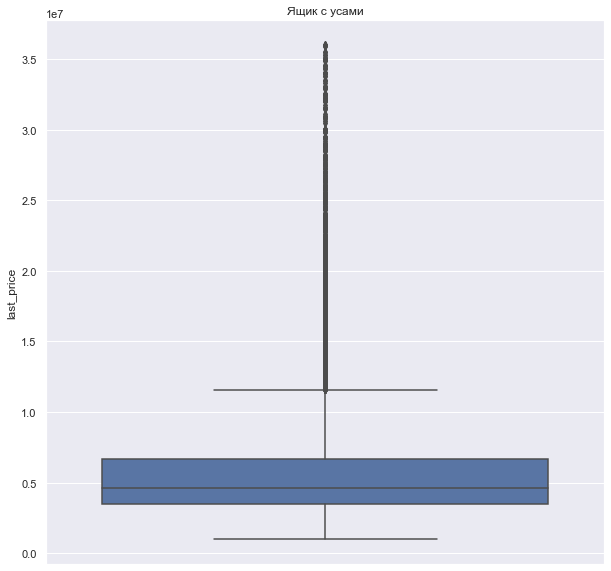

In [13]:
# Выявление аномалий с помощью "ящика с усами"
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.boxplot(y="last_price", data=df)
plt.title("Ящик с усами")
plt.show()

In [14]:
# Определение границ усов
Q1, median, Q3 = np.percentile(np.asarray(df.last_price), [25, 50, 75])
IQR = Q3 - Q1
loval = Q1 - 1.5 * IQR
hival = Q3 + 1.5 * IQR
wiskhi = np.compress(np.asarray(df.last_price) <= hival, np.asarray(df.last_price))
wisklo = np.compress(np.asarray(df.last_price) >= loval, np.asarray(df.last_price))
actual_hival = np.max(wiskhi)
actual_loval = np.min(wisklo)
print(f"{actual_loval} -> Границы усов -> {actual_hival}")

1000000 -> Границы усов -> 11564288


In [15]:
# Количество отбрасываемых данных
df[df.last_price > actual_hival].shape[0]

1896

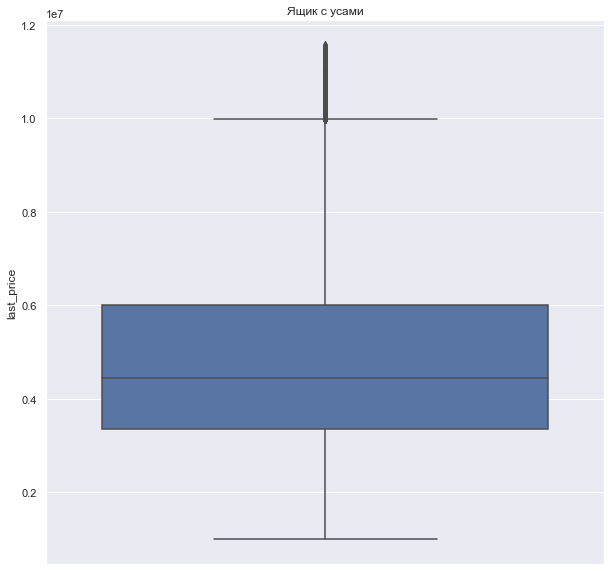

In [16]:
# Повторная фильтрация данных
df = df[(df.last_price >= actual_loval) & (df.last_price <= actual_hival)]

# Просмотр результата
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.boxplot(y="last_price", data=df)
plt.title("Ящик с усами")
plt.show()

In [17]:
# Визуализация данных

def visualization(column):
    plt.figure(figsize=(20, 15))
    plt.subplot(2, 2, 1)
    sns.boxplot(y=column, data=df)
    plt.subplot(2, 2, 2)
    sns.histplot(x=column, bins = 50, data=df);

In [18]:
# Исследование признака total_area (площадь квартиры)- проблем с признаком не обнаружено
np.round(df["total_area"].describe())

count    21341.0
mean        53.0
std         19.0
min         12.0
25%         39.0
50%         49.0
75%         64.0
max        230.0
Name: total_area, dtype: float64

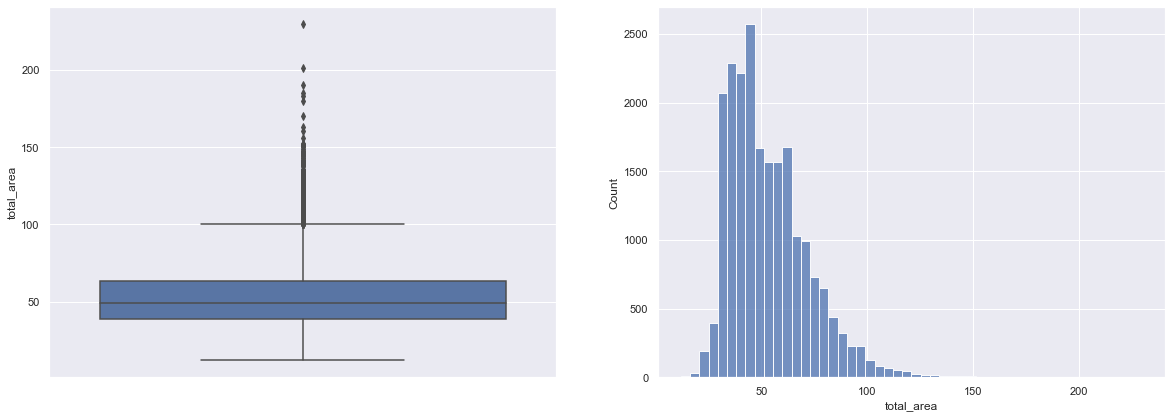

In [19]:
# Визуализация данных
visualization("total_area")

In [20]:
# Исследование признака rooms - имеется квартира без комнат
np.round(df["rooms"].describe())

count    21341.0
mean         2.0
std          1.0
min          0.0
25%          1.0
50%          2.0
75%          3.0
max          7.0
Name: rooms, dtype: float64

In [21]:
# Фильтрация данных
df = df[df.rooms >= 1]

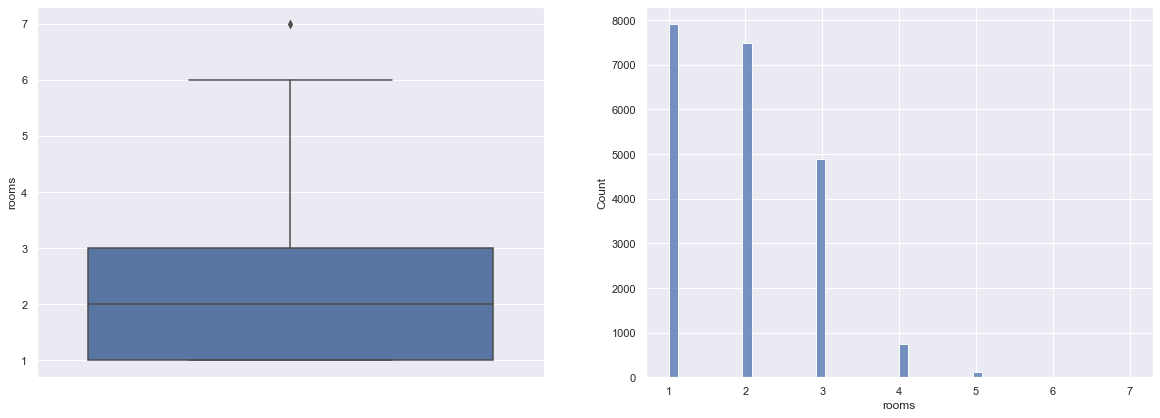

In [22]:
# Визуализация данных
visualization("rooms")

In [23]:
# Исследование признака ceiling_height - аномальная высота потолка в 1м и 32м
np.round(df["ceiling_height"].describe())

count    12882.0
mean         3.0
std          1.0
min          1.0
25%          2.0
50%          3.0
75%          3.0
max         32.0
Name: ceiling_height, dtype: float64

In [24]:
# Фильтрация данных
df = df[(df.ceiling_height >= 2.5) & (df.ceiling_height <= 4)]

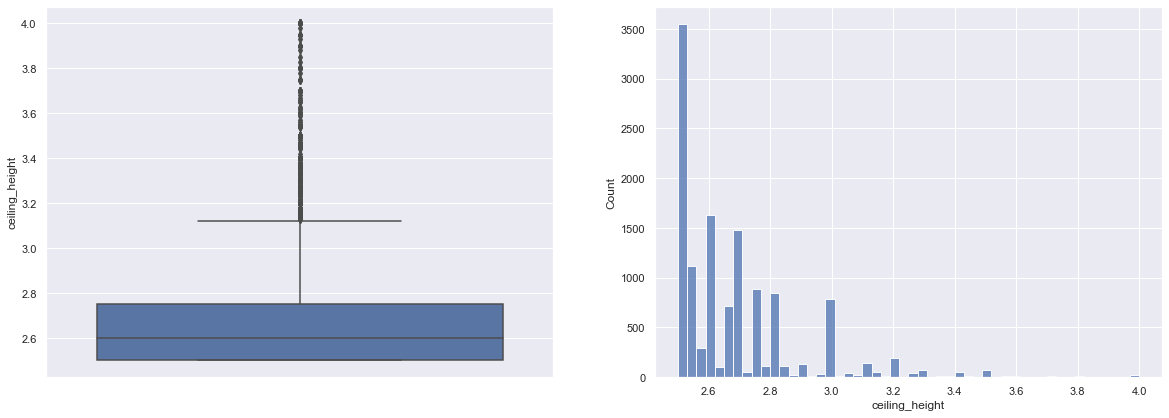

In [25]:
# Визуализация данных
visualization("ceiling_height")

In [26]:
# Исследование признака floors_total (этажей в доме)- проблем с признаком не обнаружено
np.round(df["floors_total"].describe())

count    12758.0
mean        10.0
std          6.0
min          1.0
25%          5.0
50%          9.0
75%         14.0
max         60.0
Name: floors_total, dtype: float64

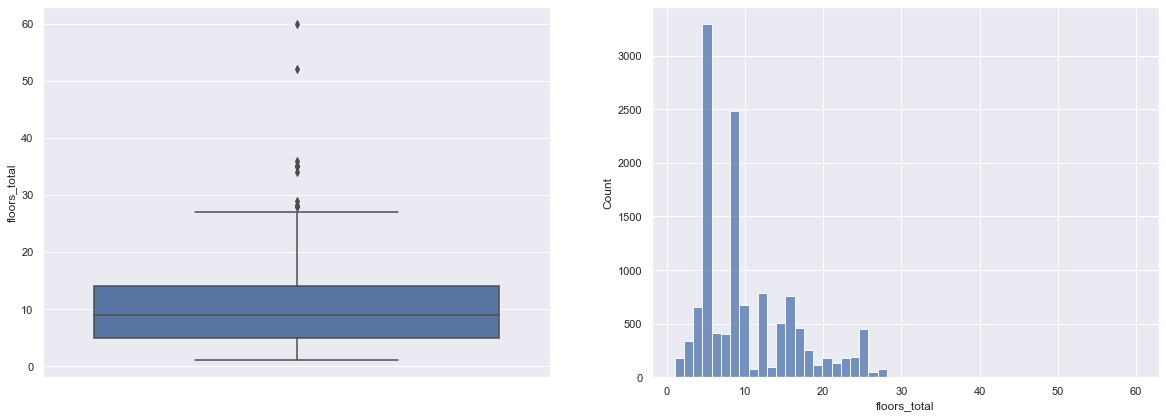

In [27]:
# Визуализация данных
visualization("floors_total")

In [28]:
# Исследование признака living_area - минимальная жилая площадь 2 кв.м, что мало для жилого помещения
np.round(df["living_area"].describe())

count    12095.0
mean        31.0
std         14.0
min          2.0
25%         19.0
50%         30.0
75%         40.0
max        112.0
Name: living_area, dtype: float64

In [29]:
# Фильтрация данных
df = df[df.living_area > 2]

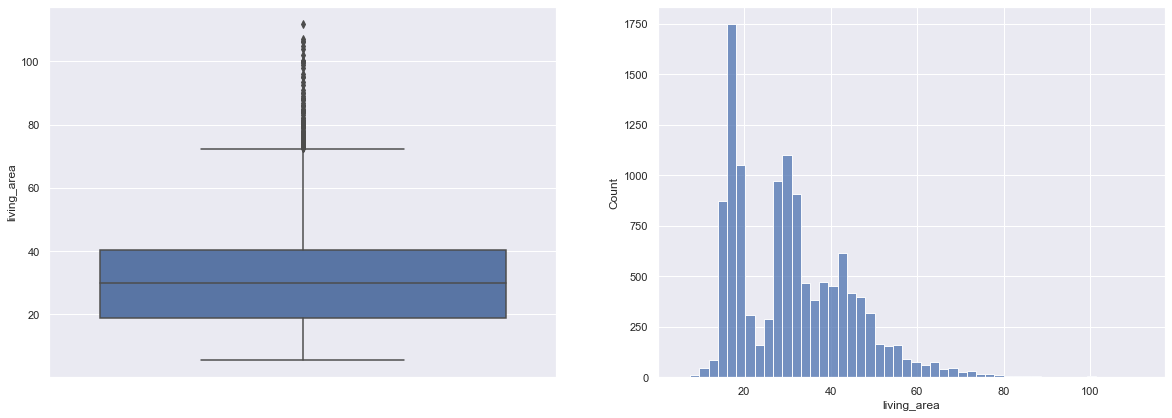

In [30]:
# Визуализация данных
visualization("living_area")

In [31]:
# Исследование признака floor_number (этаж) - проблем с признаком не обнаружено
np.round(df["floor_number"].describe())

count    12094.0
mean         6.0
std          5.0
min          1.0
25%          2.0
50%          4.0
75%          8.0
max         30.0
Name: floor_number, dtype: float64

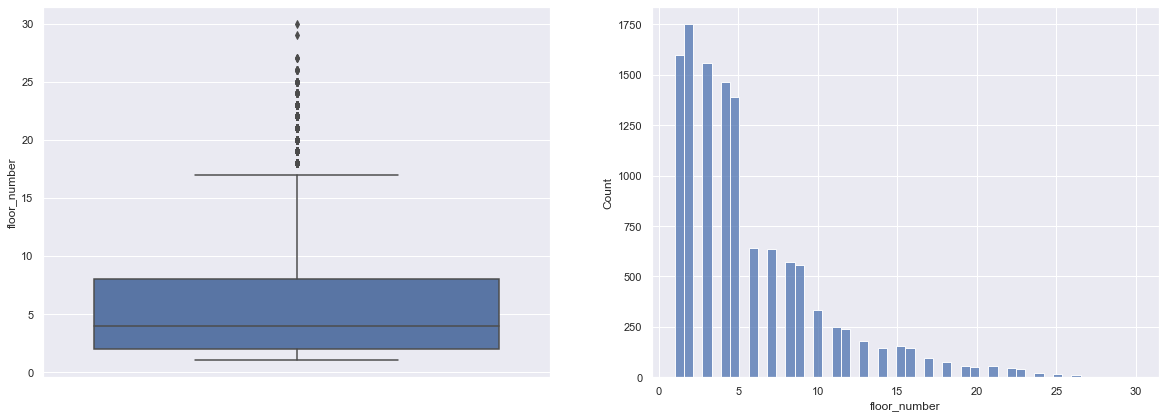

In [32]:
# Визуализация данных
visualization("floor_number")

In [33]:
# Исследование признака kitchen_area - маловероятные значения площади кухни 1 кв.м и 64 кв.м
np.round(df["kitchen_area"].describe())

count    11844.0
mean         9.0
std          4.0
min          1.0
25%          7.0
50%          9.0
75%         11.0
max         64.0
Name: kitchen_area, dtype: float64

In [34]:
# Фильтрация данных
df = df[(df.kitchen_area > 1) & (df.kitchen_area < 64)]

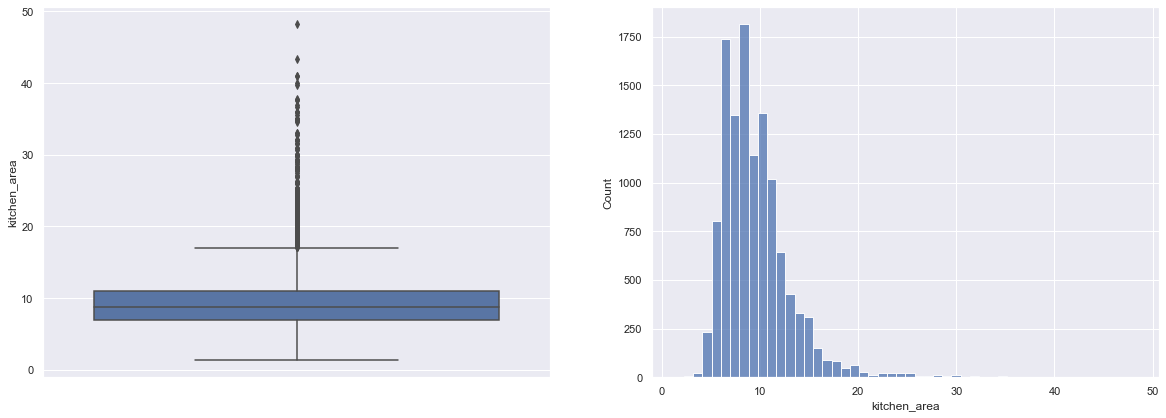

In [35]:
# Визуализация данных
visualization("kitchen_area")

In [36]:
# Исследование признака balcony - проблем с признаком не обнаружено
np.round(df["balcony"].describe())

count    6154.0
mean        1.0
std         1.0
min         0.0
25%         1.0
50%         1.0
75%         2.0
max         5.0
Name: balcony, dtype: float64

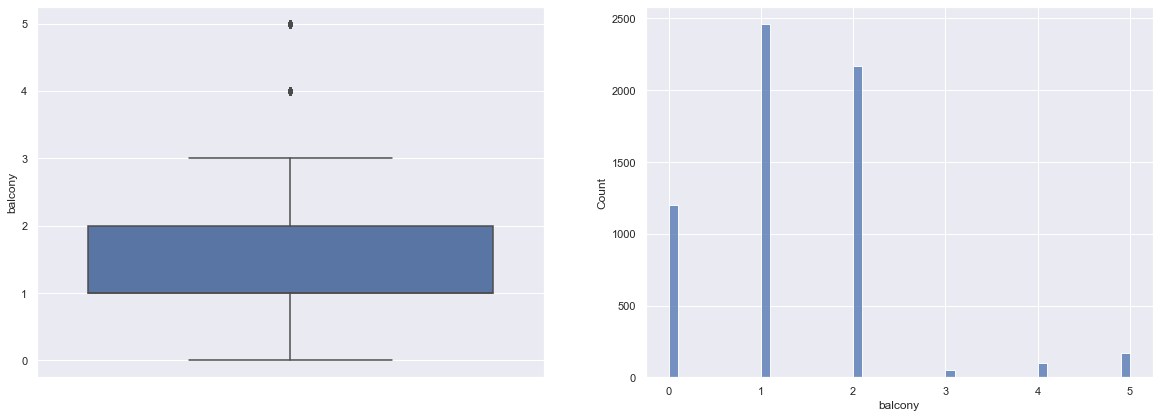

In [37]:
# Визуализация данных
visualization("balcony")

In [38]:
# Исследование признака airports_nearest - имеется квартира на территории аэропорта
np.round(df["airports_nearest"].describe())

count     9323.0
mean     28976.0
std      13037.0
min          0.0
25%      17928.0
50%      27107.0
75%      37434.0
max      84869.0
Name: airports_nearest, dtype: float64

In [39]:
# Фильтрация данных
df = df[df.airports_nearest > 0]

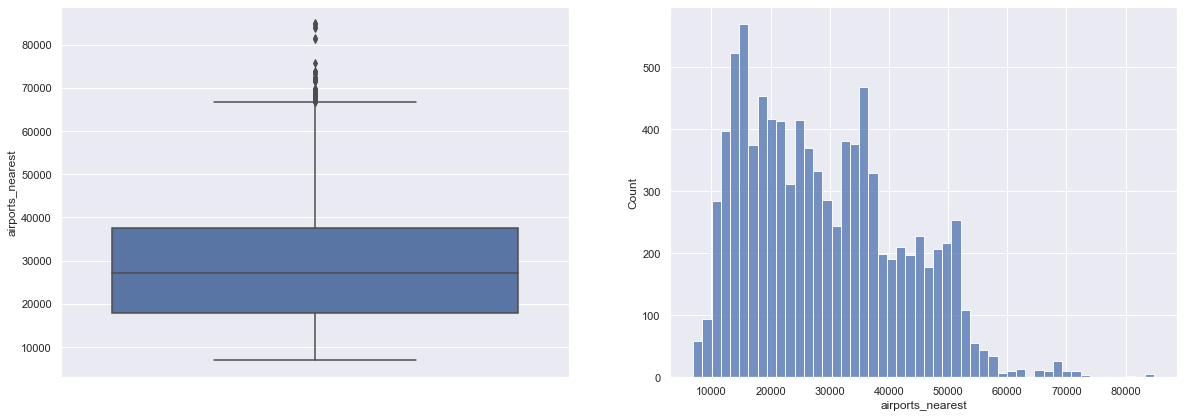

In [40]:
# Визуализация данных
visualization("airports_nearest")

In [41]:
# Исследование признака city_centers_nearest (расстояние до центра города) - проблем не обнаружено
np.round(df["city_centers_nearest"].describe())

count     9321.0
mean     14987.0
std       8760.0
min        208.0
25%      10647.0
50%      13558.0
75%      16432.0
max      65968.0
Name: city_centers_nearest, dtype: float64

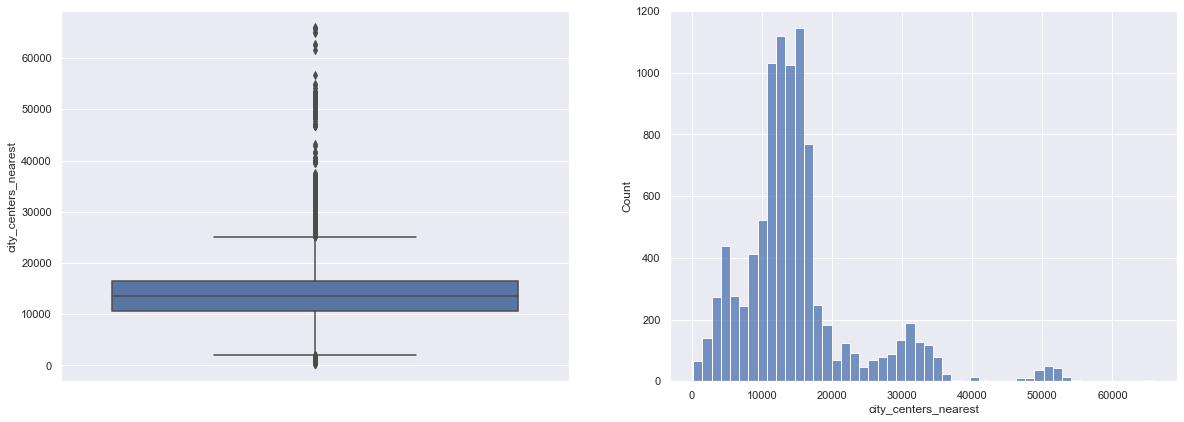

In [42]:
# Визуализация данных
visualization("city_centers_nearest")

In [43]:
# Исследование признака parks_around3000 (число парков в радиусе 3км) - аномалий не обнаружено
np.round(df["parks_around3000"].describe())

count    9322.0
mean        1.0
std         1.0
min         0.0
25%         0.0
50%         0.0
75%         1.0
max         3.0
Name: parks_around3000, dtype: float64

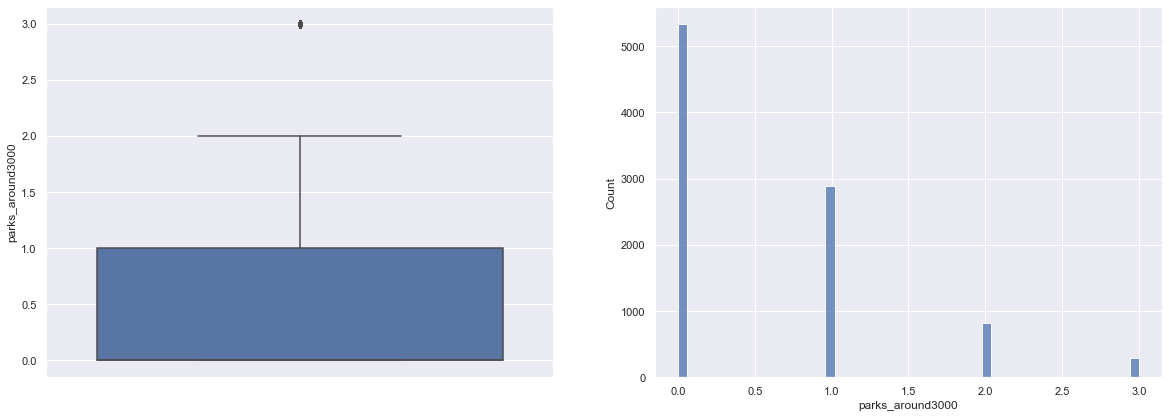

In [44]:
# Визуализация данных
visualization("parks_around3000")

In [45]:
# Исследование признака ponds_around3000 (число водоемом в радиусе 3км) - аномалий не обнаружено
np.round(df["ponds_around3000"].describe())

count    9322.0
mean        1.0
std         1.0
min         0.0
25%         0.0
50%         0.0
75%         1.0
max         3.0
Name: ponds_around3000, dtype: float64

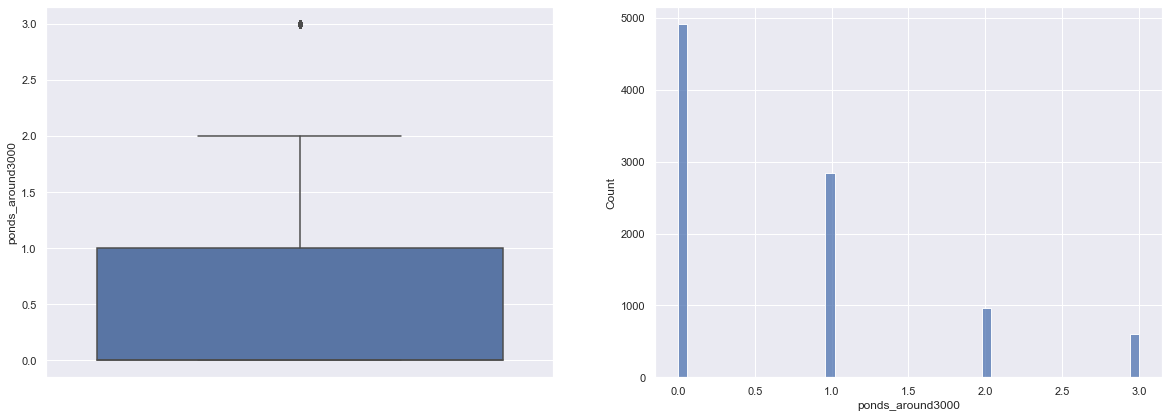

In [46]:
# Визуализация данных
visualization("ponds_around3000")

In [47]:
# Исследование признака parks_nearest (расстояние до ближайшего парка) - аномалий не обнаружено
np.round(df["parks_nearest"].describe())

count    3995.0
mean      470.0
std       290.0
min         3.0
25%       286.0
50%       451.0
75%       604.0
max      3190.0
Name: parks_nearest, dtype: float64

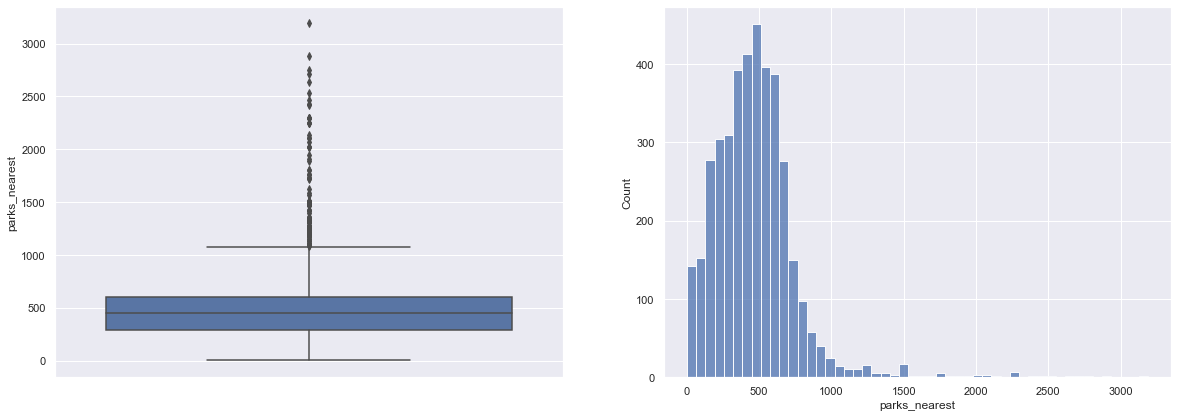

In [48]:
# Визуализация данных
visualization("parks_nearest")

In [49]:
# Исследование признака ponds_nearest (расстояние до ближайшего водоёма) - аномалий не обнаружено
np.round(df["ponds_nearest"].describe())

count    4411.0
mean      535.0
std       279.0
min        16.0
25%       312.0
50%       526.0
75%       754.0
max      1344.0
Name: ponds_nearest, dtype: float64

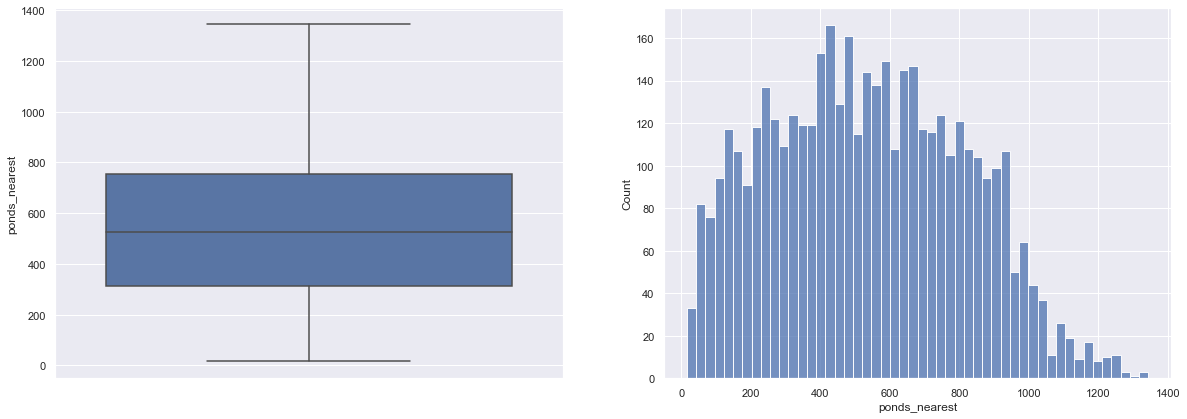

In [50]:
# Визуализация данных
visualization("ponds_nearest")

### Восстановить пропущенные значения

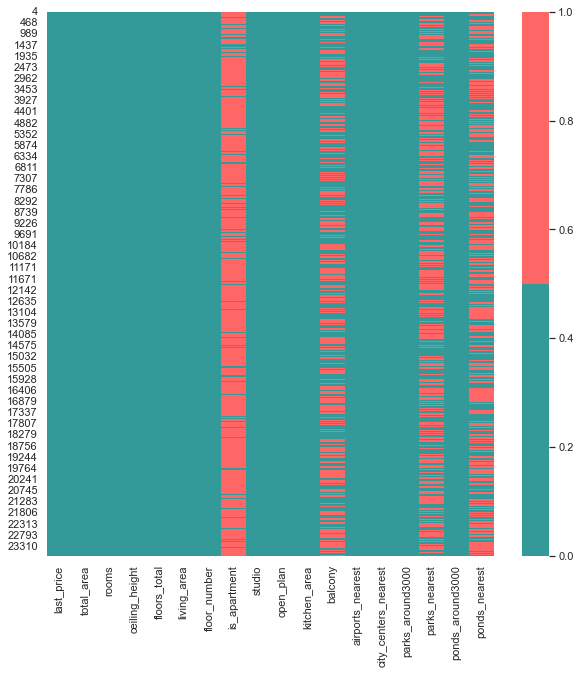

In [51]:
# Тепловая карта пропущенных значений
fig, ax = plt.subplots(figsize=(10,10))
colours = ["#339999", "#ff6666"] 
ax = sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))
plt.show()

In [52]:
# Процентный список пропущенных данных
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print("{} - {}%".format(col, round(pct_missing*100)))

last_price - 0%
total_area - 0%
rooms - 0%
ceiling_height - 0%
floors_total - 0%
living_area - 0%
floor_number - 0%
is_apartment - 87%
studio - 0%
open_plan - 0%
kitchen_area - 0%
balcony - 49%
airports_nearest - 0%
city_centers_nearest - 0%
parks_around3000 - 0%
parks_nearest - 57%
ponds_around3000 - 0%
ponds_nearest - 53%


In [53]:
# Сводная таблица по пропускам
def missing_summary_table(df):
  miss_df = pd.concat([df.isna().sum().to_frame(name = "1"), 
                 np.round(df.isna().mean().to_frame(name = "2")*100, decimals = 2)],  
                axis = 1).reset_index()
  miss_df.columns = ["Признак", "Количество пропусков", "Процент пропусков"]
  miss_df.sort_values(by = "Количество пропусков", ascending = False, inplace = True)
  miss_df["Процент пропусков"] = (miss_df["Процент пропусков"].map("{:,.2f}%".format))
  return miss_df.style.set_caption("Сводная таблица по пропускам")

miss_table = missing_summary_table(df)
miss_table

,Признак,Количество пропусков,Процент пропусков
7,is_apartment,8139,87.31%
15,parks_nearest,5327,57.14%
17,ponds_nearest,4911,52.68%
11,balcony,4588,49.22%
4,floors_total,1,0.01%
13,city_centers_nearest,1,0.01%
10,kitchen_area,0,0.00%
16,ponds_around3000,0,0.00%
14,parks_around3000,0,0.00%
12,airports_nearest,0,0.00%


In [54]:
# Удаление признаков с большим количеством пропусков (отдельный вид жилья)
df.drop(["is_apartment"], axis=1, inplace=True)

In [55]:
# df.where(cond, other=nan)
# Для каждого значения в DataFrame, где cond имеет значение True, сохраняется исходное значение.
# 3333 - искусственное значение, за пределами радиуса в 3 км

df.parks_nearest.where((df.parks_nearest.notna() & df.parks_around3000 != 0), other=3333, inplace=True)

df.ponds_nearest.where((df.ponds_nearest.notna() & df.ponds_around3000 != 0), other=3333, inplace=True)


In [56]:
# Самое часто встречаемое количество балконов
df["balcony"].mode()

0    1
Name: balcony, dtype: Int64

In [57]:
# Самое популярное число этажей в доме
df["floors_total"].mode()

0    5
Name: floors_total, dtype: Int64

In [58]:
# Среднее расстояние до центра города
df["city_centers_nearest"].median()    

13558.0

In [59]:
# Восстановление пропусков данных конкретными значениями
values = {"balcony": 1, "floors_total": 5, "city_centers_nearest": 13558.0}
df.fillna(value=values, inplace=True);

In [60]:
miss_table = missing_summary_table(df)
miss_table

,Признак,Количество пропусков,Процент пропусков
0,last_price,0,0.00%
9,kitchen_area,0,0.00%
15,ponds_around3000,0,0.00%
14,parks_nearest,0,0.00%
13,parks_around3000,0,0.00%
12,city_centers_nearest,0,0.00%
11,airports_nearest,0,0.00%
10,balcony,0,0.00%
8,open_plan,0,0.00%
1,total_area,0,0.00%


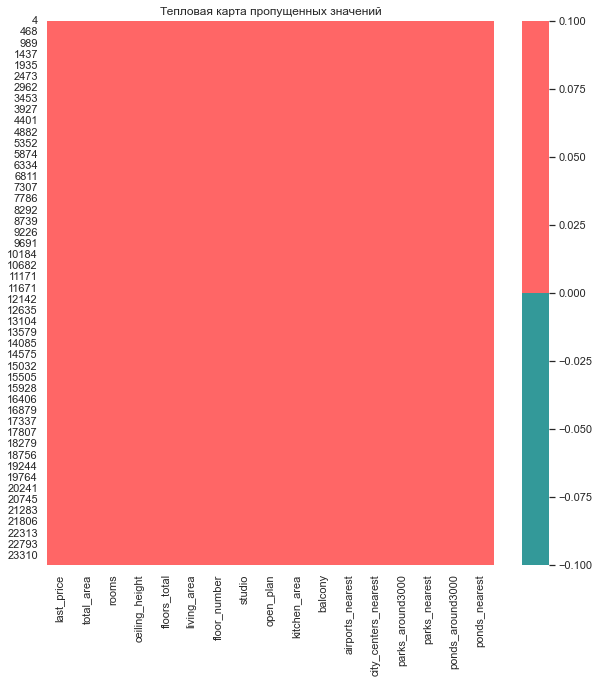

In [61]:
# Тепловая карта пропущенных значений
fig, ax = plt.subplots(figsize=(10,10))
# красный - пропущенные данные, зеленый - не пропущенные
colours = ["#339999", "#ff6666"]
ax = sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))
plt.title("Тепловая карта пропущенных значений")
plt.show()

## Исследовательский анализ данных

### Исследовать распределения признаков

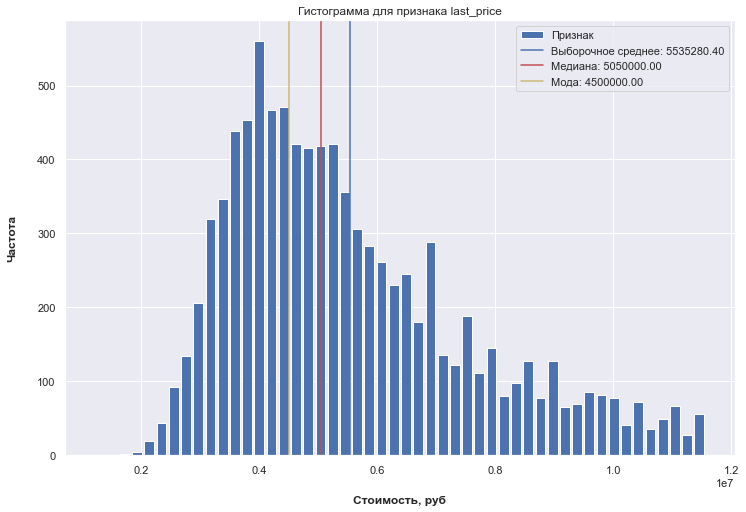

In [62]:
# Нормальность распределения целевого признака
ax = df.plot(kind = "hist", y = "last_price", bins = 50, figsize = (12, 8), rwidth = 0.8, label = "Признак");
ax.set_xlabel("Стоимость, руб", labelpad=20, weight="bold", size=12);
ax.set_ylabel("Частота", labelpad=20, weight="bold", size=12);
ax.set_title("Гистограмма для признака {}".format("last_price"));

# Визуализация описательной статистики
ax.axvline(df.last_price.mean(), color="b", label = "Выборочное среднее: {:.2f}".format(df.last_price.mean()))
ax.axvline(df.last_price.median(), color="r", label = "Медиана: {:.2f}".format(df.last_price.median()))
ax.axvline(df.last_price.mode()[0], color="y", label = "Мода: {:.2f}".format(df.last_price.mode()[0]))
ax.legend();

### Исследовать возможные зависимости между признаками

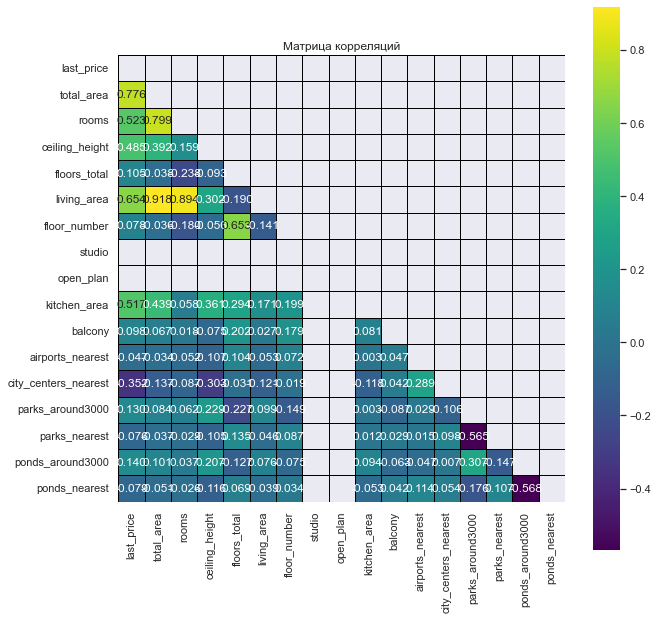

In [63]:
# Визуализация корреляционной матрицы
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(data = df.corr(), annot=True, square=True, cmap="viridis",
                 fmt=".3f", linewidths=1,linecolor="black", mask=np.triu(df.corr()))
plt.title("Матрица корреляций")
plt.show()

In [64]:
# Коэффициенты корреляции конкретных признаков
df[["last_price", "total_area", "living_area", "rooms"]].corr()

,last_price,total_area,living_area,rooms
last_price,1.000000,0.776158,0.654241,0.523353
total_area,0.776158,1.000000,0.918268,0.799076
living_area,0.654241,0.918268,1.000000,0.893976
rooms,0.523353,0.799076,0.893976,1.000000


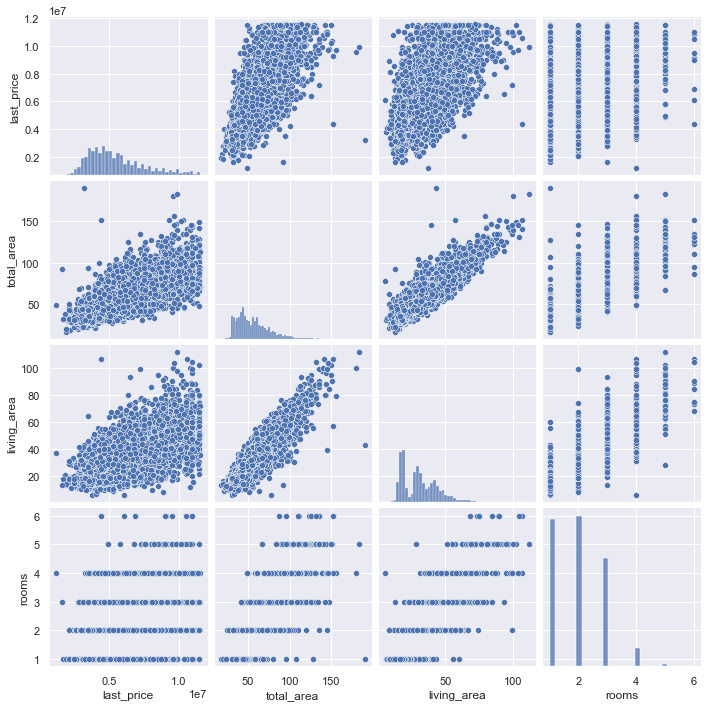

In [65]:
# Графики попарного сравнения признаков 
sns.pairplot(df[["last_price", "total_area", "living_area", "rooms"]]);

In [66]:
# Удаление признака, у которого больший частный коэффициент корреляции с целевым признаком
del df["total_area"]   # площадь квартиры
df.sample(3)

,last_price,rooms,ceiling_height,floors_total,living_area,floor_number,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
17144,6800000,4,2.5,9,48.7,4,False,False,7.0,1,13853,14787,0,3333,0,3333
15181,3000000,3,2.6,5,40.0,1,False,False,10.8,0,39800,18855,0,3333,2,3333
12180,5100000,3,2.6,9,38.8,1,False,False,7.4,1,36913,13827,0,3333,0,3333


### Группировка данных

In [67]:
# Найти максимальную стоимость квартир в зависимости от числа комнат
data = df.groupby('rooms', as_index = False).\
agg(mean_price = ('last_price','mean'), 
    max_price = ('last_price','max'),
    max_living_area = ('living_area','max')).\
    sort_values(by='rooms', ascending = True)
data

,rooms,mean_price,max_price,max_living_area
0,1,4216601.136449,11500000,60.0
1,2,5733281.621564,11520000,99.5
2,3,6602318.438188,11562376,93.6
3,4,7532012.323529,11564288,107.0
4,5,9301000.0,11500000,112.0
5,6,8592666.666667,11000000,106.5


## Регрессионные модели

* построить несколько моделей регрессии с различным набором признаков и сравнить их по метрикам (MSE, $R^2$, MAPE).

### Парная линейная регрессия по признаку living_area (жилая площадь)

In [68]:
# Отбор признаков
X = df.living_area.values
y = df.last_price.values

# Получение набора векторов
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

# Разбиение на обучющее и тестовое множества
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Обучение объекта линейной регрессии
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Построение прогноза на тестовом множестве
y_pred = linear_regression.predict(X_test)
y_pred # предсказанное значение

array([[7783191.82859748],
       [6016218.65827024],
       [6750043.58146625],
       ...,
       [5127904.27755928],
       [4104411.62152275],
       [6267264.02673204]])

### Метрики (living_area)

In [69]:
# Средняя квадратичная ошибка
mean_squared_error(y_test, y_pred)

2363312197034.301

In [70]:
# Коэффициент детерминации
r2_score(y_test, y_pred)

0.4273276886224433

In [71]:
# Средняя абсолютная процентная ошибка
mean_absolute_percentage_error(y_test, y_pred)

0.22828776033848508

In [72]:
metrics = {}
metrics["Pair_lr_living_area"] = [mean_squared_error(y_test, y_pred),
                                  r2_score(y_test, y_pred),
                                  mean_absolute_percentage_error(y_test, y_pred)]

### Парная линейная регрессия по признаку rooms (число комнат)

In [73]:
# Отбор признаков
X = df.rooms.values
y = df.last_price.values

# Получение набора векторов
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

# Разбиение на обучющее и тестовое множества
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Обучение объекта линейной регрессии
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Построение прогноза на тестовом множестве
y_pred = linear_regression.predict(X_test)
y_pred # предсказанное значение

array([[7839869.22023866],
       [6677107.96941862],
       [6677107.96941862],
       ...,
       [5514346.71859857],
       [4351585.46777853],
       [5514346.71859857]])

### Метрики (rooms)

In [74]:
# Средняя квадратичная ошибка
mean_squared_error(y_test, y_pred)

2985178052567.1133

In [75]:
# Коэффициент детерминации
r2_score(y_test, y_pred)

0.27663860179690414

In [76]:
# Средняя абсолютная процентная ошибка
mean_absolute_percentage_error(y_test, y_pred)

0.2613229936193487

In [77]:
metrics["Pair_lr_rooms"] = [mean_squared_error(y_test, y_pred),
                            r2_score(y_test, y_pred),
                            mean_absolute_percentage_error(y_test, y_pred)]

### Множественная линейная регрессия по признакам ceiling_height (высота потолка), kitchen_area (площадь кухни), balcony (число балконов)

In [78]:
# Отбор признаков
X = df[["ceiling_height", "kitchen_area", "balcony"]].values
y = df.last_price.values

# Разбиение на обучющее и тестовое множества
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Обучение объекта линейной регрессии
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Построение прогноза на тестовом множестве
y_pred = linear_regression.predict(X_test)
y_pred

array([5222921.30027588, 4306442.29257741, 4173085.89999694, ...,
       4393188.9885239 , 4996886.50245137, 7733858.60122373])

### Метрики (ceiling_height , kitchen_area, balcony)

In [111]:
# Средняя квадратичная ошибка
warnings.filterwarnings('ignore')
mean_squared_error(y_test, y_pred)

1296053897908.716

In [80]:
# Коэффициент детерминации
r2_score(y_test, y_pred)

0.3665192157833612

In [81]:
# Средняя абсолютная процентная ошибка
mean_absolute_percentage_error(y_test, y_pred)

0.24917040100779547

In [82]:
metrics["Multi_ch_ka_b"] = [mean_squared_error(y_test, y_pred),
                            r2_score(y_test, y_pred),
                            mean_absolute_percentage_error(y_test, y_pred)]

### Множественная линейная регрессия по признакам city_centers_nearest (расстояние до центра города), parks_nearest (расстояние до ближайшего парка), ponds_around3000 (число водоёмов в радиусе 3 км)

In [83]:
# Отбор признаков
X = df[["city_centers_nearest", "parks_nearest", "ponds_around3000"]].values
y = df.last_price.values

# Разбиение на обучющее и тестовое множества
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Обучение объекта линейной регрессии
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Построение прогноза на тестовом множестве
y_pred = linear_regression.predict(X_test)
y_pred

array([6009069.28535766, 6159748.02882537, 5234019.16046654, ...,
       4025787.86143785, 5709664.25537985, 6186818.15578011])

### Метрики (city_centers_nearest , parks_nearest, ponds_around3000)

In [84]:
# Средняя квадратичная ошибка
mean_squared_error(y_test, y_pred)

3604294901417.9487

In [85]:
# Коэффициент детерминации
r2_score(y_test, y_pred)

0.1266156478726954

In [86]:
# Средняя абсолютная процентная ошибка
mean_absolute_percentage_error(y_test, y_pred)

0.29718842179690375

In [87]:
metrics["Multi_ccn_pn_pa3"] = [mean_squared_error(y_test, y_pred),
                            r2_score(y_test, y_pred),
                            mean_absolute_percentage_error(y_test, y_pred)]

### Множественная линейная регрессия по всем признакам, кроме значений bool

In [88]:
# Отбор признаков
X = df[["rooms", "ceiling_height", "floors_total", "living_area", "floor_number", "kitchen_area", 
        "balcony", "airports_nearest", "city_centers_nearest", "parks_around3000", "parks_nearest", 
        "ponds_around3000", "ponds_nearest"]].values
y = df.last_price.values

# Разбиение на обучющее и тестовое множества
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Обучение объекта линейной регрессии
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Построение прогноза на тестовом множестве
y_pred = linear_regression.predict(X_test)
y_pred

array([7296935.21127967, 5245052.0503334 , 5635521.13591609, ...,
       3337552.13069107, 4452971.59516622, 8139786.14150096])

### Метрики (все признаки)

In [89]:
# Средняя квадратичная ошибка
mean_squared_error(y_test, y_pred)

1296053897908.716

In [90]:
# Коэффициент детерминации
r2_score(y_test, y_pred)

0.6859432358041082

In [91]:
# Средняя абсолютная процентная ошибка
mean_absolute_percentage_error(y_test, y_pred)

0.154266916780072

In [92]:
metrics["Multi_all"] = [mean_squared_error(y_test, y_pred),
                            r2_score(y_test, y_pred),
                            mean_absolute_percentage_error(y_test, y_pred)]

### Сравнение метрик

In [93]:
# Множественная линейная регрессия на основе всех признаков самая состоятельная
df_metrics = pd.DataFrame(metrics, index=["MSE", "R^2", "MAPE"])
df_metrics

,Pair_lr_living_area,Pair_lr_rooms,Multi_ch_ka_b,Multi_ccn_pn_pa3,Multi_all
MSE,2.363312e+12,2.985178e+12,2.614257e+12,3.604295e+12,1.296054e+12
R^2,4.273277e-01,2.766386e-01,3.665192e-01,1.266156e-01,6.859432e-01
MAPE,2.282878e-01,2.613230e-01,2.491704e-01,2.971884e-01,1.542669e-01


## Проверка гипотез

* сформулировать и проверить гипотезу о равенстве средних площадей кухни в 2-х и 3-х комнатных квартирах.

#### Гипотеза H0: Средние площади кухни в 2-х и 3-х комнатных квартирах равны
#### Гипотеза H1: Средние площади кухни в 2-х и 3-х комнатных квартирах НЕ равны

In [94]:
# Выборки площадей кухни в 2-х комнатных квартирах
df_sk2 = df[df['rooms'] == 2].kitchen_area
df_sk2

4         41.0
13         5.2
25        15.0
31        13.4
39         8.8
         ...  
23662    11.44
23668      9.0
23678      4.9
23681      6.0
23691     10.6
Name: kitchen_area, Length: 3274, dtype: Float64

In [95]:
# Выборки площадей кухни в 3-х комнатных квартирах
df_sk3 = df[df['rooms'] == 3].kitchen_area
df_sk3

9          6.5
16         9.0
20        12.0
27         9.2
65         7.0
         ...  
23667     11.0
23680      7.0
23688     15.0
23693      8.0
23694    13.83
Name: kitchen_area, Length: 2362, dtype: Float64

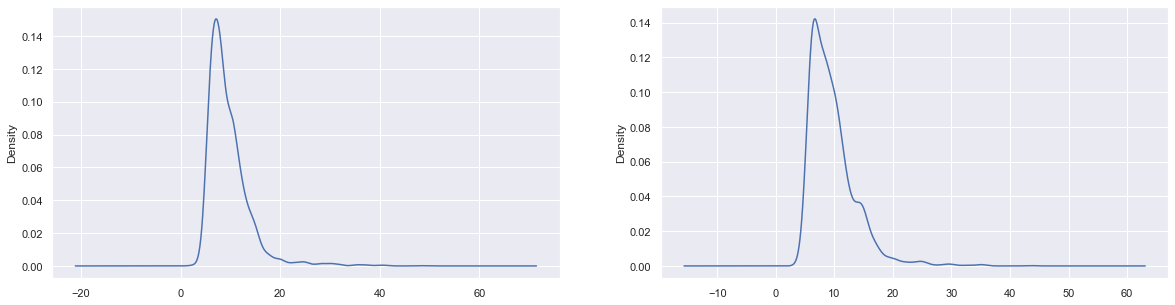

In [96]:
# Проверка нормальности или отличие от нормального распределения выборок
fig, ax = plt.subplots(1,2, figsize = (20, 5))

plt.subplot(121)
df_sk2.plot(kind = 'density')

plt.subplot(122)
df_sk3.plot(kind = 'density');

# По графикам видно, что средние значения примерно равны, но распределение отлично от нормального.

In [97]:
# Для более строгой проверки, воспользуемся критерием Шапиро-Уилка.

# В данном случае: 
# H0 - выборки распределены нормально
# H1 - выборки распределены не нормально

In [98]:
shapiro_test = shapiro(df_sk2)
shapiro_test

ShapiroResult(statistic=0.7714298367500305, pvalue=0.0)

In [99]:
shapiro_test = shapiro(df_sk3)
shapiro_test

ShapiroResult(statistic=0.8326470851898193, pvalue=2.2420775429197073e-44)

In [100]:
# Значение pvalue в обоих случаях получается меньше 0,05. 
# Поэтому мы не можем принять нулевую гипотезу о нормальности выборок, 
# т.е. распределение выборок отлично от нормального.

In [101]:
# Так как, распределение выборок отлично от нормального, то для проверки гипотезы о равенстве средних
# воспользуемся критерием Манна-Уитни и тестом Краскела-Уоллиса.

# В данном случае:
# H0 - среднее значение рассматриваемых выборок не отличаются
# H1 - средние по выборкам отличаются

In [109]:
# Критерий Манна-Уитни
mannwhitneyu(df_sk2, df_sk3) 

# MannwhitneyuResult(statistic=3767497.0, pvalue=0.09996662697439337)

In [110]:
# Tест Краскела-Уоллиса
kruskal(df_sk2, df_sk3)

# KruskalResult(statistic=2.7061031067028267, pvalue=0.09996491537604983)

In [ ]:
# Значения pvalue больше, чем 0.05 и следует принять нулевую гипотезу о равенстве средних

In [112]:
# Среднее значение выборки площади кухни в 2-х комнатных квартирах 
df_sk2.mean()

9.577632864996945

In [113]:
# Среднее значение выборки площади кухни в 3-х комнатных квартирах 
df_sk3.mean()

9.664801016088061

**Вывод:** средние значения прощадей кухни в 2-х и 3-х комнатных квартирах не отличаются.

## Спасибо за внимание!

#### Презентация подготовлена с помощью расширения RISE для Jupyter Notebook

https://rise.readthedocs.io/en/stable/index.html

https://rise.readthedocs.io/en/stable/resources.html

https://github.com/damianavila/RISE